# Image coding fundamentals

### Motivation

In [1]:
!wget http://www.hpca.ual.es/~vruiz/images/Homer.png

--2017-10-13 14:00:24--  http://www.hpca.ual.es/~vruiz/images/Homer.png
Resolving www.hpca.ual.es... 150.214.150.42
Connecting to www.hpca.ual.es|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374512 (366K) [image/png]
Saving to: ‘Homer.png.1’

Homer.png.1         100%[===================>] 365.73K  1.10MB/s    in 0.3s    

2017-10-13 14:00:24 (1.10 MB/s) - ‘Homer.png.1’ saved [374512/374512]



![Homer.png](./Homer.png)

In [2]:
!echo `wc -c < Homer.png` bytes

374512 bytes


In [3]:
!convert -quality 40 Homer.png Homer.jp2
# Note: in OSX, install imagemagick with: "brew install imagemagick --with-openjpeg"

![Homer.jp2](./Homer.jp2)

In [4]:
!echo `wc -c < Homer.jp2` bytes

28642 bytes


In [5]:
from PIL import Image, ImageChops, ImageOps
orig = Image.open('Homer.png')
comp = Image.open('Homer.jp2')
diff = ImageChops.subtract(orig, comp)
diff = ImageOps.equalize(diff)
diff.save('diff.png')

![diff.png](./diff.png)

## Spatial redundancy

Image compressors exploit *spatial redundancy* to achieve better bit-rate/distortion ratios.

In [6]:
%cd 00-fundamentals/
!wget http://www.hpca.ual.es/~vruiz/images/lena.png
!convert lena.png lena.ppm
!pnmcut -top 250 -right 350 -width 40 -height 40 < lena.ppm | pnmtopng > lena-cut.png
!fig2dev -L png -m 4 correlacion_lena.fig > correlacion_lena.png
%cd ..

/home/vruiz/home/teaching/coding/image/00-fundamentals
--2017-10-13 14:00:26--  http://www.hpca.ual.es/~vruiz/images/lena.png
Resolving www.hpca.ual.es... 150.214.150.42
Connecting to www.hpca.ual.es|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512673 (501K) [image/png]
Saving to: ‘lena.png.2’

lena.png.2          100%[===================>] 500.66K  1.27MB/s    in 0.4s    

2017-10-13 14:00:27 (1.27 MB/s) - ‘lena.png.2’ saved [512673/512673]

/home/vruiz/home/teaching/coding/image


<img src="00-fundamentals/correlacion_lena.png" style="width: 800px;"/>

Spatial redundancy generates that neighbor pixels have similar colors.

## Luminance and chrominance

[Chrominance](https://en.wikipedia.org/wiki/Chrominance) (or chroma) is the signal used in video systems to convey the color information of the picture or a video. It was defined to add the color signal to the black and white one. Thus, the same signal, composed by two different subsignals: Y and UV that can be isolated by filtering, was compatible with both, black and white (which only used Y) and color ones (that used YUV).

Later, in digital video, the YUV color domain was called the [YCrCb color domain](https://en.wikipedia.org/wiki/YCbCr).

## Spectral (color) redundancy

$\text{RGB}$ domain is more redundant than the [$\text{Y'UV}$ domain](https://en.wikipedia.org/wiki/YUV):

\begin{equation}
    \left(
      \begin{array}{c}
        \text{Y'}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          0,299 & 0,587 & 0,144 \\
          -0.14713 & -0.28886 &  0.436 \\
          0.615   & -0.51499 & -0.10001
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right)
\end{equation}

\begin{equation}
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          1 &  0       &  1.13983 \\
          1 & -0.39465 & -0.58060 \\
          1 &  2.03211 &  0
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{Y'}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right)
\end{equation}

Used, for example, in [JPEG](https://en.wikipedia.org/wiki/JPEG).

In [7]:
!wget http://www.hpca.ual.es/~vruiz/images/san-diego.png

--2017-10-13 14:00:29--  http://www.hpca.ual.es/~vruiz/images/san-diego.png
Resolving www.hpca.ual.es... 150.214.150.42
Connecting to www.hpca.ual.es|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091236 (1.0M) [image/png]
Saving to: ‘san-diego.png’

san-diego.png       100%[===================>]   1.04M  1022KB/s    in 1.0s    

2017-10-13 14:00:30 (1022 KB/s) - ‘san-diego.png’ saved [1091236/1091236]



![san-diego.png](./san-diego.png)

In [8]:
from scipy import misc
from scipy.stats import entropy
import numpy as np

In [9]:
RGB = misc.imread('san-diego.png')

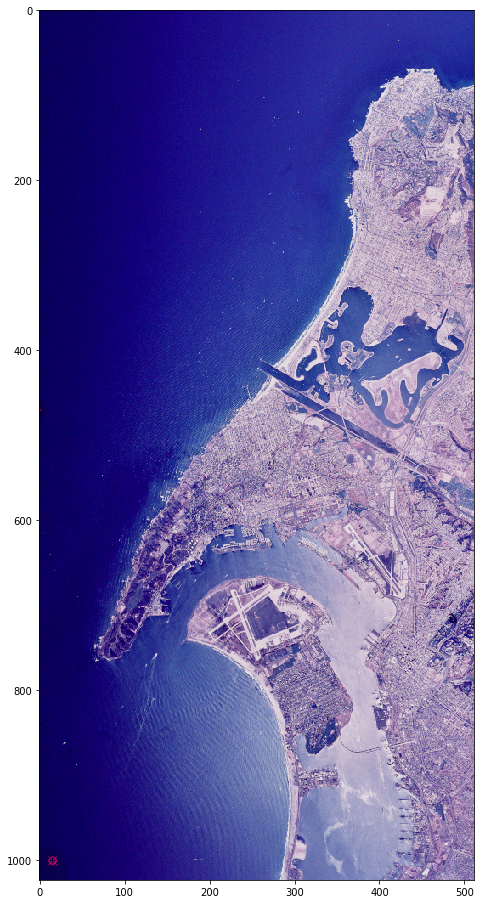

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,16))
plt.imshow(RGB)
plt.show()

In [11]:
R = RGB.copy()
R[:,:,1] = 0
R[:,:,2] = 0
G = RGB.copy()
G[:,:,0] = 0
G[:,:,2] = 0
B = RGB.copy()
B[:,:,0] = 0
B[:,:,1] = 0

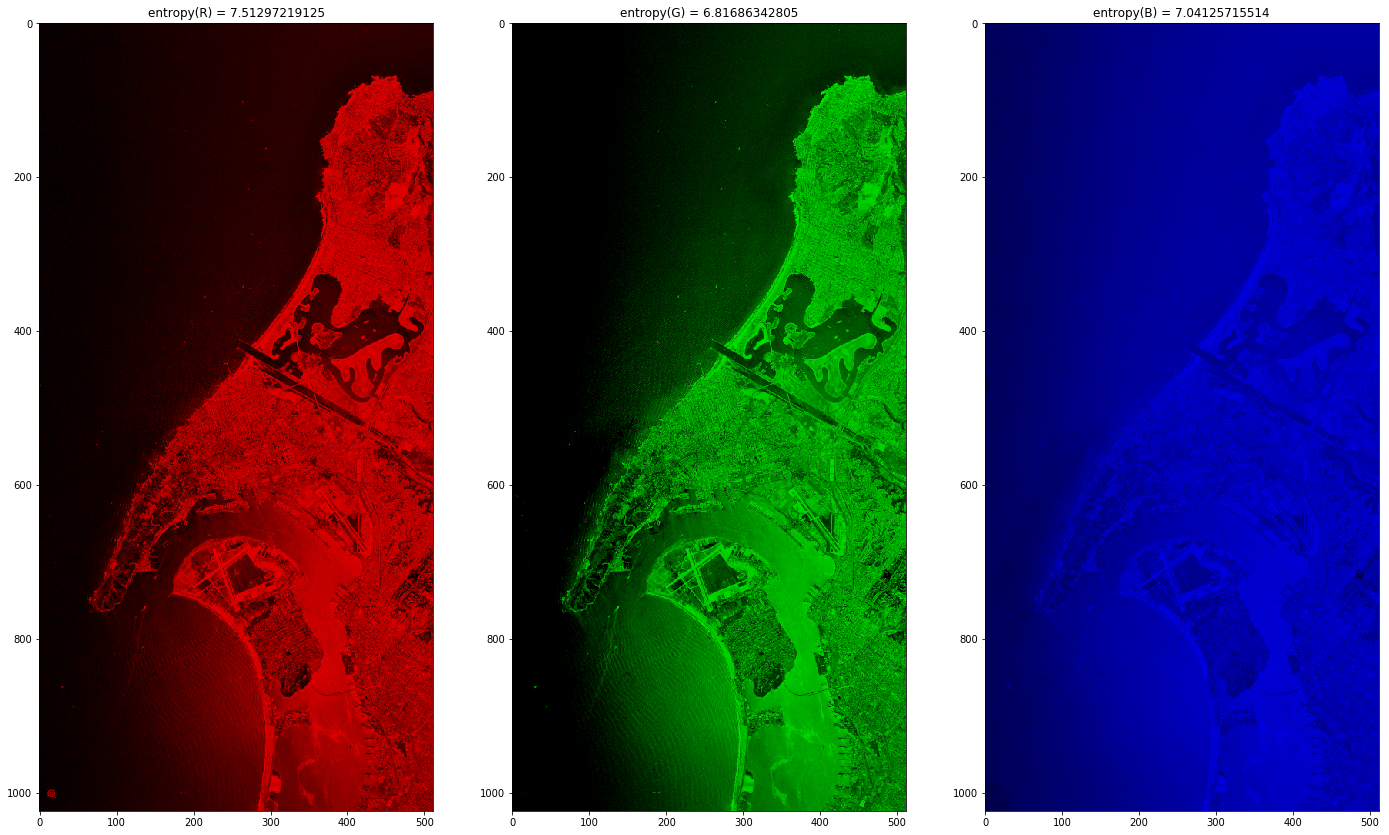

In [12]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
R_histo = np.histogram(RGB[:,:,0], bins=256)[0]
R_entropy = entropy(R_histo, base=2)
a.set_title("entropy(R) = " + str(R_entropy))
imgplot = plt.imshow(R)

a = fig.add_subplot(1,3,2)
G_histo = np.histogram(RGB[:,:,1], bins=256)[0]
G_entropy = entropy(G_histo, base=2)
a.set_title("entropy(G) = " + str(G_entropy))
imgplot = plt.imshow(G)

a = fig.add_subplot(1,3,3)
B_histo = np.histogram(RGB[:,:,2], bins=256)[0]
B_entropy = entropy(B_histo, base=2)
a.set_title("entropy(B) = " + str(B_entropy))
imgplot = plt.imshow(B)
plt.show()

# See https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

In [13]:
print('Total entropy = {}'.format(R_entropy + G_entropy + B_entropy))

Total entropy = 21.37109277444157


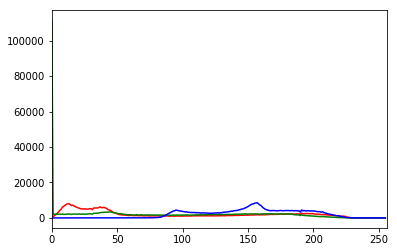

In [14]:
import cv2
components = ('r','g','b')
histr = [None for col in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([RGB],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

In [15]:
# https://stackoverflow.com/questions/43983265/rgb-to-yuv-conversion-and-accessing-y-u-and-v-channels
import cv2
import numpy as np

In [16]:
def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)

In [17]:
lut_U, lut_V = make_lut_u(), make_lut_v()

In [18]:
YUV = cv2.cvtColor(RGB, cv2.COLOR_RGB2YUV)

In [19]:
Y, U, V = cv2.split(YUV)

In [20]:
Y = cv2.cvtColor(Y, cv2.COLOR_GRAY2BGR)
U = cv2.cvtColor(U, cv2.COLOR_GRAY2BGR)
V = cv2.cvtColor(V, cv2.COLOR_GRAY2BGR)

In [21]:
U_mapped = cv2.LUT(U, lut_U)
V_mapped = cv2.LUT(V, lut_V)

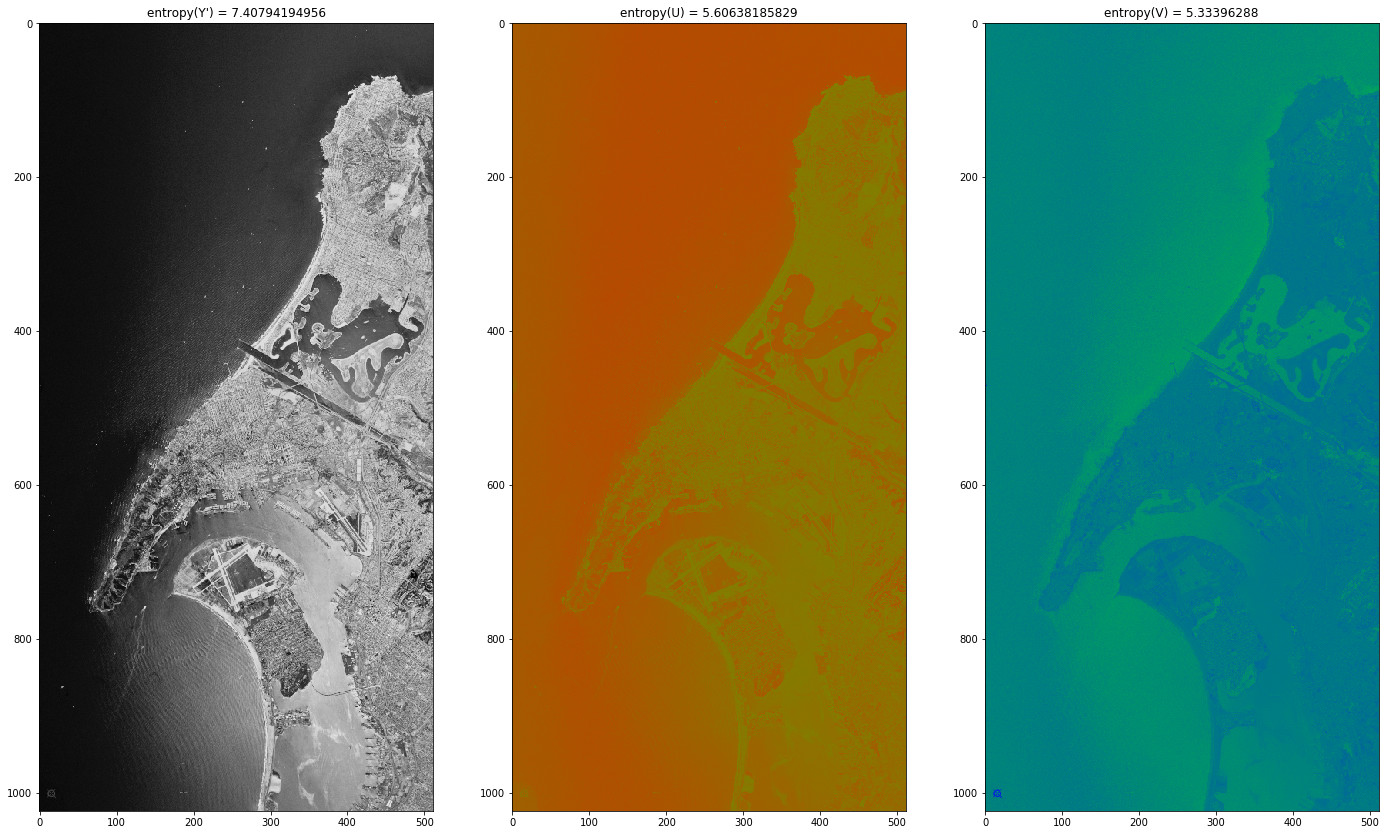

In [22]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
Y_histo = np.histogram(Y, bins=256)[0]
Y_entropy = entropy(Y_histo, base=2)
a.set_title("entropy(Y') = " + str(Y_entropy))
imgplot = plt.imshow(Y)

a = fig.add_subplot(1,3,2)
U_histo = np.histogram(U, bins=256)[0]
U_entropy = entropy(U_histo, base=2)
a.set_title("entropy(U) = " + str(U_entropy))
imgplot = plt.imshow(U_mapped)

a = fig.add_subplot(1,3,3)
V_histo = np.histogram(V, bins=256)[0]
V_entropy = entropy(V_histo, base=2)
a.set_title("entropy(V) = " + str(V_entropy))
imgplot = plt.imshow(V_mapped)

plt.show()

In [23]:
print('Total entropy = {}'.format(Y_entropy + U_entropy + V_entropy))

Total entropy = 18.34828668784023


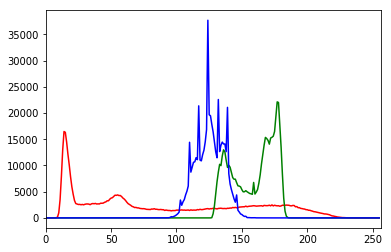

In [24]:
histr = [None for com in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([YUV],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

## Chrominance subsampling

[The human visual system is more sensitive to the luma (Y’) than to the chroma (UV)](https://en.wikipedia.org/wiki/Chroma_subsampling). This means than the chroma can be subsampled without a signiﬁcant loss of quality in the images.

In [25]:
%cd 00-fundamentals/
!fig2dev -L svg -m 4 color_subsampling.fig > color_subsampling.svg
%cd ..

/home/vruiz/home/teaching/coding/image/00-fundamentals
/home/vruiz/home/teaching/coding/image


<img src="00-fundamentals/color_subsampling.svg" style="width: 800px;"/>

In [26]:
import pywt

In [27]:
def subsample_chroma(image, levels):
    subsampled = np.ndarray((image.shape[0], image.shape[1], 3), 'uint8')
    
    # Luma
    subsampled[:,:,0] = image[:,:,0]

    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,1], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # LH subband
        DWT_coeffs[i+1][1][:,:] = 0.0 # HL subband
        DWT_coeffs[i+1][2][:,:] = 0.0 # HH subband

    subsampled[:,:,1] = pywt.waverec2(DWT_coeffs, 'bior3.5')
                  
    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,2], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # LH subband
        DWT_coeffs[i+1][1][:,:] = 0.0 # HL subband
        DWT_coeffs[i+1][2][:,:] = 0.0 # HH subband
    subsampled[:,:,2] = pywt.waverec2(DWT_coeffs, 'bior3.5')

    return (subsampled, (subsampled.shape[0], subsampled.shape[1]), DWT_coeffs[0].shape)

In [28]:
chroma_subsampled_YUV, luma_shape, chroma_shape = subsample_chroma(YUV, 5)
print("Luma shape =", luma_shape, "\nChroma shape =", chroma_shape)

Luma shape = (1024, 512) 
Chroma shape = (42, 26)


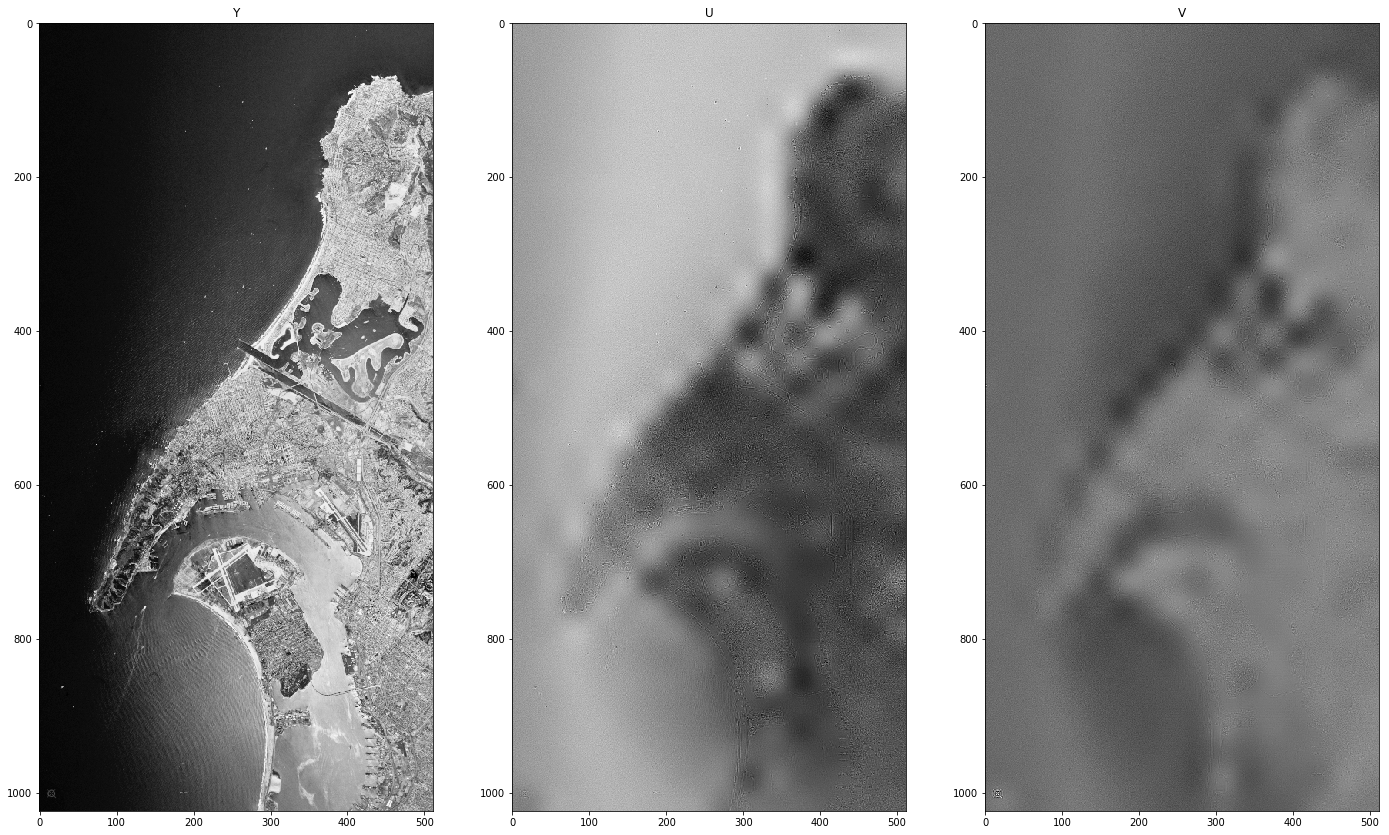

In [29]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
a.set_title("Y")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,0], cmap='gray')

a = fig.add_subplot(1,3,2)
a.set_title("U")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray')

a = fig.add_subplot(1,3,3)
a.set_title("V")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,2], cmap='gray')

plt.show()
#plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray' # Shows U
#plt.show()

In [30]:
chroma_subsampled_RGB = cv2.cvtColor(chroma_subsampled_YUV, cv2.COLOR_YUV2RGB)

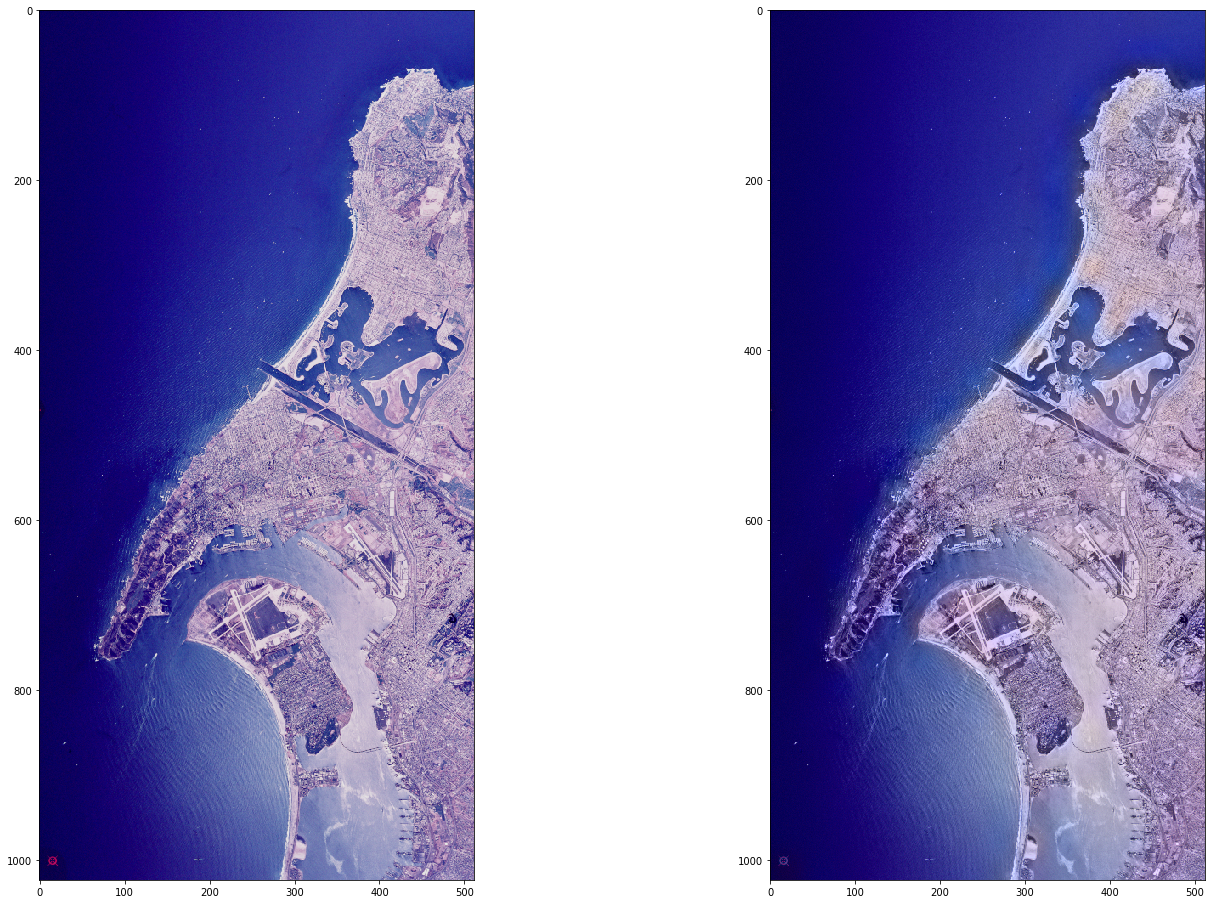

In [31]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,2,1) # Rows, cols, subfigure
plt.imshow(RGB)

a = fig.add_subplot(1,2,2) # Rows, cols, subfigure
plt.imshow(chroma_subsampled_RGB)

plt.show()

In [32]:
print("The subsampled image uses", \
      luma_shape[0]*luma_shape[1] +
      chroma_shape[0]*chroma_shape[1] * 2,
      "bytes"
     )
print("The original image uses", \
      luma_shape[0]*luma_shape[1] * 3,
      "bytes"
     )

The subsampled image uses 526472 bytes
The original image uses 1572864 bytes


## DCT (Discrete Cosine Transform)

### Definition

Forward (direct) transform:

\begin{equation}
  \text{DCT}[u] = \frac{\sqrt{2}}{\sqrt{N}}
  K(u)\sum_{n=0}^{N-1} s[n]\cos\frac{(2n+1)\pi u}{2n},
\end{equation}

backward (inverse) transform:

\begin{equation}
  s[n] = \frac{\sqrt{2}}{\sqrt{N}}
  \sum_{u=0}^{N-1} K(u)\text{DCT}[u]\cos\frac{(2n+1)\pi u}{2n},
\end{equation}

where $N$ is the number of pixels, and $s[n]$ denotes the $n$-th pixel
of the image $s$, and

\begin{equation}
  K(u) =
  \left\{
    \begin{array}{ll}
      \frac{1}{\sqrt{2}} & \text{si}~u=0\\
      1 & \text{if}~u>0.
    \end{array}
    \right.
\end{equation}

### Properties

1. **Separable**: the $D$-dimensional DCT can be computed using the $1$D DCT in each possible dimension.
2. In general, **high energy compactation**: a small number of DCT coefficients can reconstruct with a reasonable accuracy the original signal.
3. **Unitary**: the energy of the DCT coefficients is proportional to the energy of the samples.